=== Iniciando análisis de predicción de enfermedad cardíaca ===

=== Información del Dataset ===
Dimensiones: (297, 14)

Primeras 5 filas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Estadísticas descriptivas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2

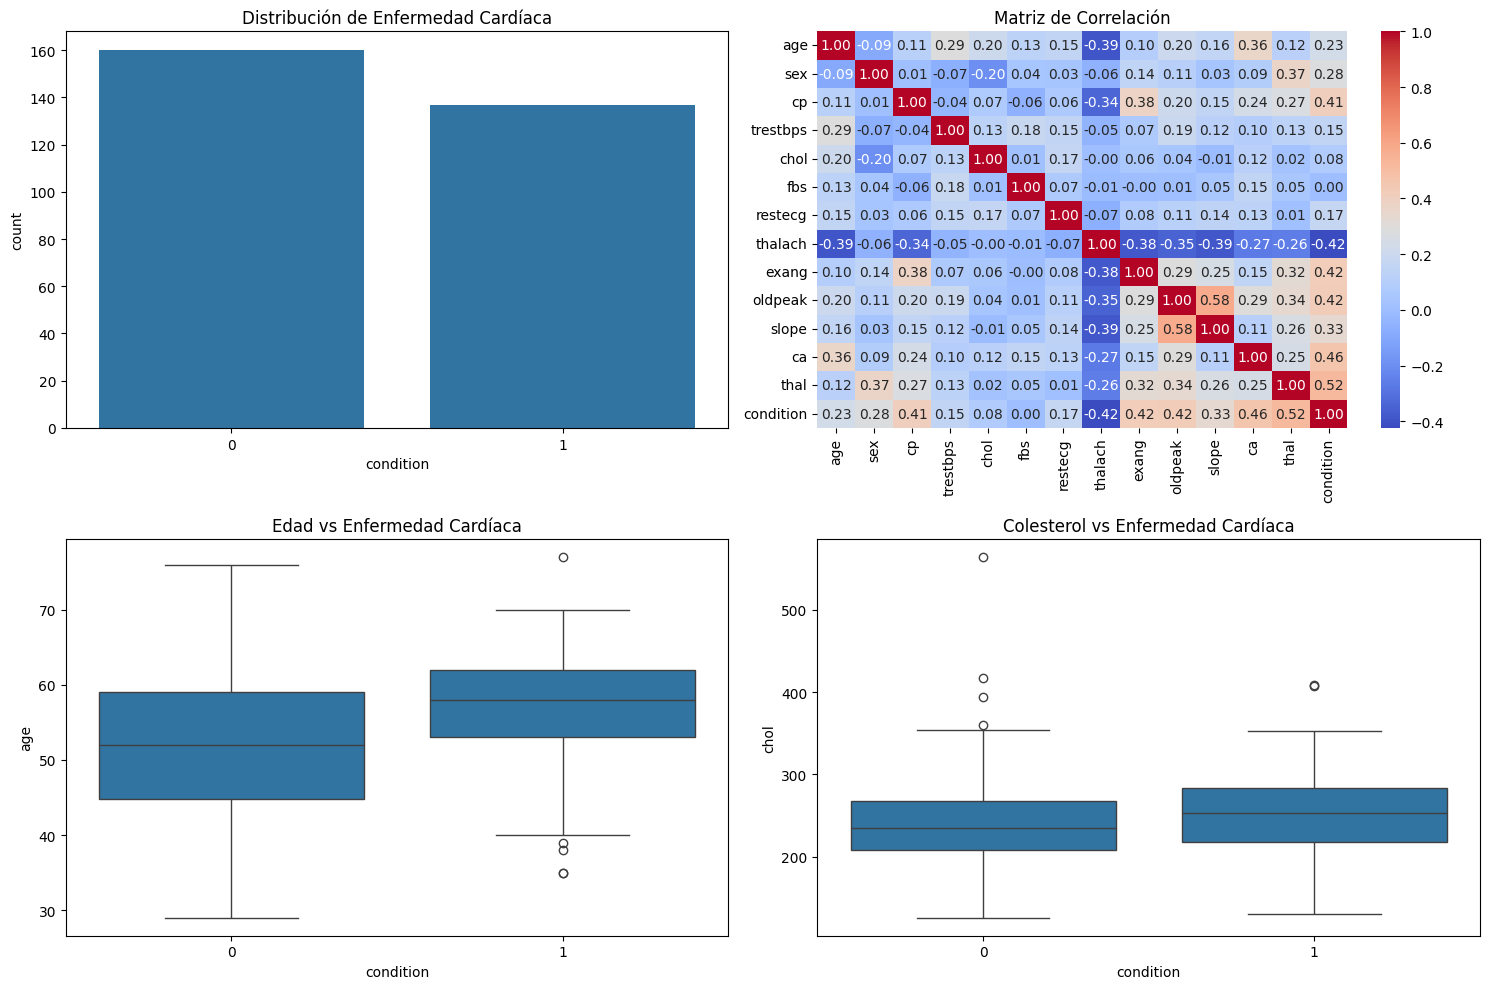

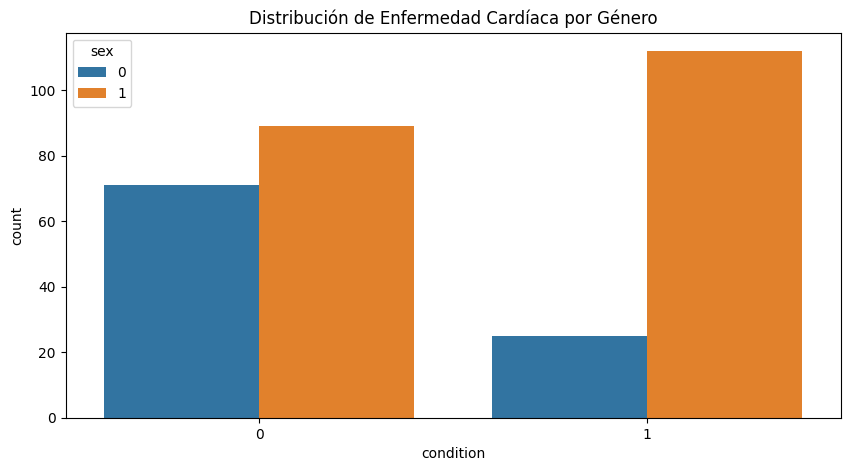


Características numéricas: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Características categóricas: Index([], dtype='object')

Entrenando modelo...

=== Métricas de Evaluación ===

Train Set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.85      0.80      0.82       109

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237


Test Set:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



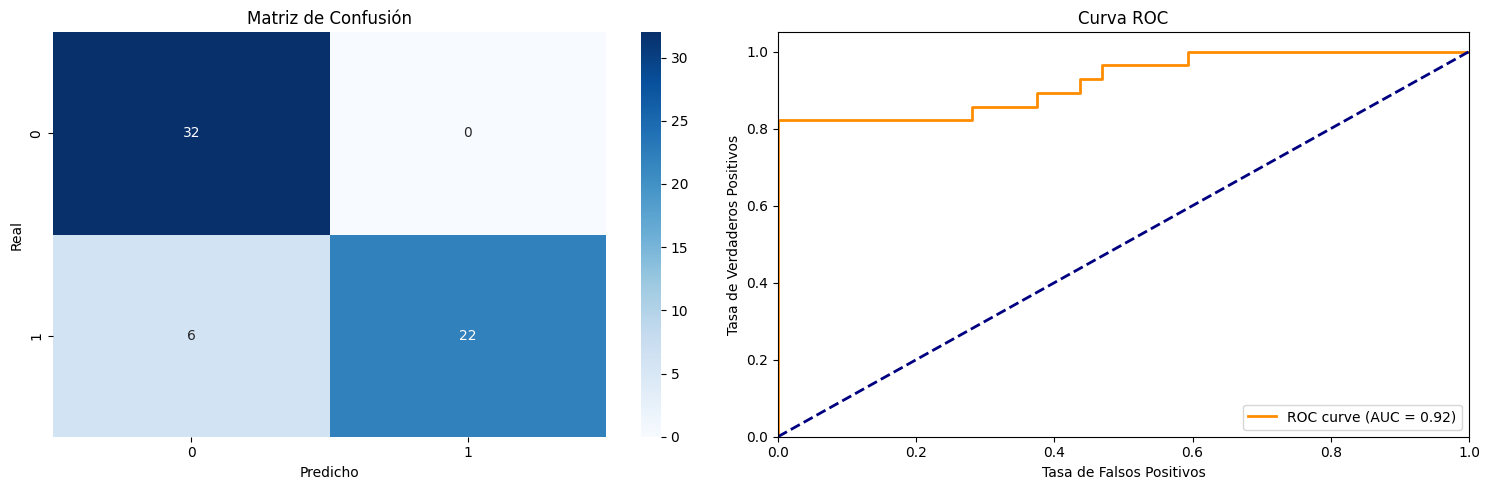

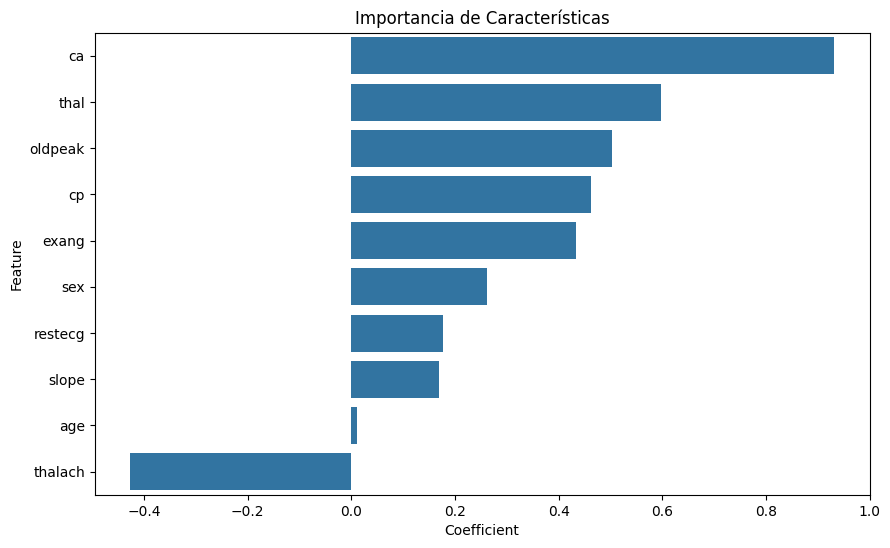


Importancia de características:
   Feature  Coefficient
8       ca     0.932303
9     thal     0.598109
6  oldpeak     0.503490
2       cp     0.463313
5    exang     0.433431
1      sex     0.261335
3  restecg     0.177554
7    slope     0.168967
0      age     0.010253
4  thalach    -0.427256

=== Interpretación de Resultados ===

    1. Rendimiento del modelo:
       - Accuracy: Porcentaje de predicciones correctas
       - Precision: Capacidad del modelo para evitar falsos positivos
       - Recall: Capacidad del modelo para detectar casos positivos
       - F1-score: Balance entre precision y recall
       
    2. Matriz de Confusión:
       - Verdaderos Positivos: Casos correctamente identificados como enfermos
       - Falsos Positivos: Casos incorrectamente identificados como enfermos
       - Verdaderos Negativos: Casos correctamente identificados como sanos
       - Falsos Negativos: Casos incorrectamente identificados como sanos
       
    3. Curva ROC:
       - Muestra el

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Carga y Análisis Exploratorio de Datos
def load_and_explore_data(path):
    # Cargar datos
    df = pd.read_csv(path)

    print("=== Información del Dataset ===")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    print("\nValores faltantes:")
    print(df.isnull().sum())

    # Visualizaciones
    plt.figure(figsize=(15, 10))

    # Distribución de la variable objetivo
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='condition')
    plt.title('Distribución de Enfermedad Cardíaca')

    # Correlación entre variables
    plt.subplot(2, 2, 2)
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación')

    # Distribución de edad por condición
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='condition', y='age')
    plt.title('Edad vs Enfermedad Cardíaca')

    # Distribución de colesterol por condición
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='condition', y='chol')
    plt.title('Colesterol vs Enfermedad Cardíaca')

    plt.tight_layout()
    plt.show()

    # Análisis adicional: Distribución por género
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='condition', hue='sex')
    plt.title('Distribución de Enfermedad Cardíaca por Género')
    plt.show()

    return df

# 2. Preprocesamiento de datos
def preprocess_data(df):
    # Eliminar duplicados
    df = df.drop_duplicates()

    # Separar características y variable objetivo
    X = df.drop('condition', axis=1)
    y = df['condition']

    # Identificar columnas numéricas y categóricas
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    return X, y, numeric_features, categorical_features

# 3. y 4. Creación del pipeline con selección de características y división de datos
def create_pipeline_and_split_data(X, y):
    # Crear pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_classif, k=10)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    return pipeline, X_train, X_test, y_train, y_test

# 5. Entrenamiento del modelo
def train_model(pipeline, X_train, y_train):
    pipeline.fit(X_train, y_train)
    return pipeline

# 6. Evaluación del modelo
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    # Predicciones
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Probabilidades de predicción
    y_train_prob = pipeline.predict_proba(X_train)
    y_test_prob = pipeline.predict_proba(X_test)

    # Métricas de evaluación
    print("\n=== Métricas de Evaluación ===")
    print("\nTrain Set:")
    print(classification_report(y_train, y_train_pred))
    print("\nTest Set:")
    print(classification_report(y_test, y_test_pred))

    return y_test_pred, y_test_prob

# 7. Visualización de resultados
def plot_results(y_test, y_pred, y_prob):
    plt.figure(figsize=(15, 5))

    # Matriz de confusión
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicho')
    plt.ylabel('Real')

    # Curva ROC
    plt.subplot(1, 2, 2)
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# 8. Análisis de características importantes
def analyze_feature_importance(pipeline, X):
    # Obtener las características seleccionadas
    selector = pipeline.named_steps['selector']
    selected_features_mask = selector.get_support()
    selected_features = X.columns[selected_features_mask]

    # Obtener coeficientes del modelo
    coefficients = pipeline.named_steps['classifier'].coef_[0]

    # Crear DataFrame con características y sus coeficientes
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Coefficient': coefficients
    })
    feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

    # Visualizar importancia de características
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
    plt.title('Importancia de Características')
    plt.show()

    return feature_importance

# 9. Función principal que ejecuta todo el proceso
def main(path):
    print("=== Iniciando análisis de predicción de enfermedad cardíaca ===\n")

    # 1. Cargar y explorar datos
    df = load_and_explore_data(path)

    # 2. Preprocesar datos
    X, y, numeric_features, categorical_features = preprocess_data(df)
    print("\nCaracterísticas numéricas:", numeric_features)
    print("Características categóricas:", categorical_features)

    # 3 y 4. Crear pipeline y dividir datos
    pipeline, X_train, X_test, y_train, y_test = create_pipeline_and_split_data(X, y)

    # 5. Entrenar modelo
    print("\nEntrenando modelo...")
    model = train_model(pipeline, X_train, y_train)

    # 6. Evaluar modelo
    y_pred, y_prob = evaluate_model(model, X_train, X_test, y_train, y_test)

    # 7. Visualizar resultados
    plot_results(y_test, y_pred, y_prob)

    # 8. Analizar importancia de características
    feature_importance = analyze_feature_importance(model, X)
    print("\nImportancia de características:")
    print(feature_importance)

    # 9. Interpretación de resultados
    print("\n=== Interpretación de Resultados ===")
    print("""
    1. Rendimiento del modelo:
       - Accuracy: Porcentaje de predicciones correctas
       - Precision: Capacidad del modelo para evitar falsos positivos
       - Recall: Capacidad del modelo para detectar casos positivos
       - F1-score: Balance entre precision y recall

    2. Matriz de Confusión:
       - Verdaderos Positivos: Casos correctamente identificados como enfermos
       - Falsos Positivos: Casos incorrectamente identificados como enfermos
       - Verdaderos Negativos: Casos correctamente identificados como sanos
       - Falsos Negativos: Casos incorrectamente identificados como sanos

    3. Curva ROC:
       - Muestra el rendimiento del clasificador en todos los umbrales
       - Un AUC más cercano a 1 indica mejor capacidad de discriminación

    4. Características importantes:
       - Muestra qué factores tienen mayor influencia en la predicción
       - Coeficientes positivos aumentan la probabilidad de enfermedad
       - Coeficientes negativos disminuyen la probabilidad de enfermedad
    """)

# Función para realizar predicciones en nuevos datos
def predict_heart_disease(model, patient_data):
    """
    Realiza predicción para un nuevo paciente

    Args:
        model: modelo entrenado
        patient_data: diccionario con los datos del paciente
    """
    # Convertir datos del paciente a DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Realizar predicción
    prediction = model.predict(patient_df)
    probability = model.predict_proba(patient_df)

    return prediction[0], probability[0]

if __name__ == "__main__":
    path = "/content/heart_cleveland_upload.csv"  # Reemplazar con la ruta correcta
    main(path)